## Step 1 - Checking the data

In [3]:
#init
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
#loading data
retail = pd.read_csv('./Online_Retail.csv', encoding = 'latin1')

In [4]:
# Print out First 5 rows from dataframe
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Print out brief info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

In [6]:
#Check for NaN values
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Examine few examples of NaN values
retail[retail['Description'].isnull()].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


In [8]:
#Exclude negative Quantity entries
retail = retail[(retail['Quantity'] >= 0)]
#Eliminate Negative Quantity, keep >=0

In [9]:
#Exclude negative Price entries
retail = retail[(retail['UnitPrice'] >= 0)]
#Same as Quantity

## Step 3 - EDA

In [22]:
#The customer with the highest number of orders comes from the United Kingdom (UK)
retail_customer = retail[retail['Country']=='United Kingdom'].groupby('CustomerID').size()
#groupby Customer ID to find the number of order each Customer ID made
retail_customer.sort_values(ascending = False).head(1)
#sort then Show the highest

CustomerID
17841.0    7847
dtype: int64

In [36]:
#The customer with the highest money spent on purchases comes from Netherlands
retail_money = retail[retail['Country']=='Netherlands']
#list Netherlands Orders
retail_money['TotalPrice'] = retail_money['UnitPrice']*retail_money['Quantity']
#Calculate TotalPrice of each Order
retail_money = retail_money.groupby(['CustomerID'])['TotalPrice'].sum()
#Calculate sum of TotalPrice of each CustomerID
retail_money.sort_values(ascending = True).tail(1)
#sort and show the highest

CustomerID
14646.0    280206.02
Name: TotalPrice, dtype: float64

In [48]:
#On which year had the highest sales?
retail['InvoiceDate'] = pd.to_datetime(retail.InvoiceDate)
#change type first 
retail['TotalPrice'] = retail['UnitPrice']*retail['Quantity']
#then calculate the Sale each order
retail_perYear = retail.groupby(retail.InvoiceDate.dt.year)['TotalPrice'].sum()
#calculate sum of TotalPrice each Year
retail_perYear.sort_values(ascending = True).tail(1)
#sort and show

InvoiceDate
2011    9.842938e+06
Name: TotalPrice, dtype: float64

In [49]:
#How many orders (per hour)?
retail.InvoiceDate.dt.hour.value_counts()

12    77230
15    76432
13    71075
14    66266
11    56312
16    53451
10    47895
9     33755
17    27635
8      8805
18     7729
19     3516
20      802
7       379
6         1
Name: InvoiceDate, dtype: int64

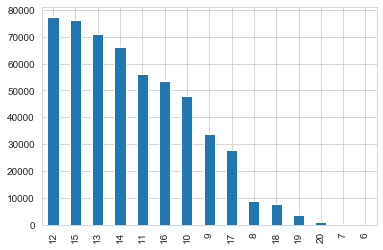

In [51]:
#Make a plot about number of orders per hour
retail.InvoiceDate.dt.hour.value_counts().plot(kind = 'bar')

In [50]:
#How many orders (per month)?
retail.InvoiceDate.dt.month.value_counts()

11    83498
12    66818
10    59396
9     49323
7     38716
5     36292
6     36056
3     35915
8     34564
1     34350
4     29171
2     27184
Name: InvoiceDate, dtype: int64

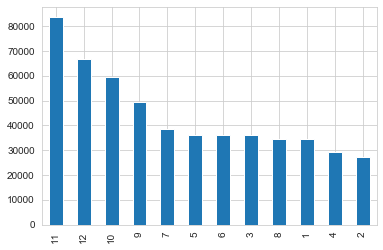

In [52]:
#Make a plot about number of orders per month
retail.InvoiceDate.dt.month.value_counts().plot(kind = 'bar')

In [53]:
#Top 10 items most sales
retail['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [ ]:
#Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK